In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [2]:
table = html_soup.find_all('tr', class_='data-row')
table

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [3]:
mars_temperature_data = []
for row in table:
    row_data = row.find_all('td')
    row = [col.text for col in row_data]
    mars_temperature_data.append(row)
mars_temperature_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [4]:
mars_df = pd.DataFrame(mars_temperature_data,columns=['id', 'terrestrial_date', 
                                                     'sol', 'ls', 'month', 'min_temp', 
                                                     'pressure'])
mars_df
           

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [6]:
mars_df.sol = mars_df.sol.astype('int')
mars_df.ls = mars_df.ls.astype('int')
mars_df.month = mars_df.month.astype('int')

In [7]:
mars_df.min_temp = mars_df.min_temp.astype('float')
mars_df.pressure = mars_df.pressure.astype('float')

In [8]:
mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date)

In [9]:
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# Answer the following question: How many months exist on Mars?
### answer: There are 12 months in Mars
mars_df['month'].value_counts()

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [11]:
# Answer the following question: 
# How many Martian (and not Earth) days worth of data exist in 
# the scraped dataset?
### answer: 1867 Martian (and not Earth) days worth of data exist.
mars_df['sol'].nunique()

1867

In [12]:
# Answer the following question: What are
# the coldest and the warmest months on Mars 
#(at the location of Curiosity)? Get the answer by 
# averaging the minimum daily temperature of all the months. 
### answer: Coldest month is the 3rd month (-83), Warmest month is the 8th month (-68).
min_temp = mars_df.groupby('month')['min_temp'].mean()
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Minimum Temp')

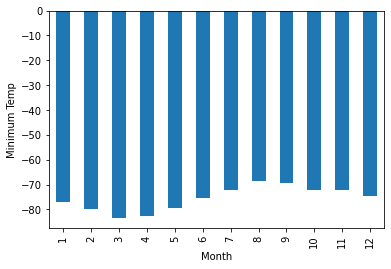

In [13]:
# Plot the results as a bar chart.
ax = min_temp.plot.bar()
plt.xlabel("Month")
plt.ylabel("Minimum Temp")

In [14]:
#  Which months have the lowest and the highest 
# atmospheric pressure on Mars? Get the answer by averaging the 
# daily atmospheric pressure of all the months.
### answer: Lowest atmospheric pressure is 6th month (745) and Highest atmospheric pressure is 9th month (913).
low_pressure = mars_df.groupby('month')['pressure'].mean()
low_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Average Pressure')

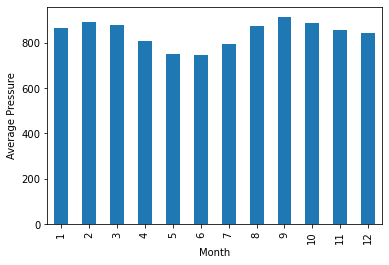

In [15]:
# Plot the results as a bar chart.
ax = low_pressure.plot.bar()
plt.xlabel("Month")
plt.ylabel("Average Pressure")

In [18]:
# Answer the following question: About how many 
# terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once,
# how many days elapse on Earth? Visually estimate the result 

## answer: There are about 687 Earth days in a Martian year
terrestrial_days = mars_df.groupby('terrestrial_date')['min_temp'].mean()
terrestrial_days


terrestrial_date
2012-08-16   -75.0
2012-08-17   -76.0
2012-08-18   -76.0
2012-08-19   -74.0
2012-08-20   -74.0
              ... 
2018-02-23   -78.0
2018-02-24   -77.0
2018-02-25   -76.0
2018-02-26   -77.0
2018-02-27   -77.0
Name: min_temp, Length: 1867, dtype: float64

(array([15340., 15706., 16071., 16436., 16801., 17167., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

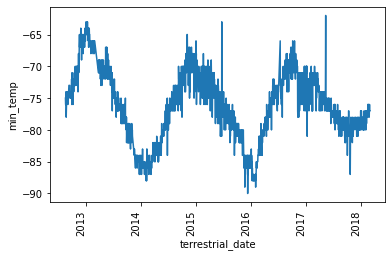

In [19]:
# Visually estimate the result by plotting the daily 
# minimum temperature.
ax =terrestrial_days.plot.line()
plt.ylabel("min_temp")
plt.xlabel("terrestrial_date")
plt.xticks(rotation='vertical')

In [20]:
mars_df.to_csv('mars.csv')